In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pyreadstat

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import pyreadstat

base_path = "/content/drive/My Drive/MS AIML Capstone/Data"

## Loading all datasets

In [5]:
import glob, os

tweet_files = ["bbchealth.txt", "cbchealth.txt", "cnnhealth.txt", "reutershealth.txt"]
all_tweets = []

for f in tweet_files:
    with open(os.path.join(base_path, f), "r", encoding="utf-8", errors="ignore") as fh:
        for line in fh:
            line = line.strip()
            if line:
                all_tweets.append({"source": f, "text": line})

tweets_df = pd.DataFrame(all_tweets)
print("Tweets shape:", tweets_df.shape)
print(tweets_df.head())

Tweets shape: (16450, 2)
          source                                               text
0  bbchealth.txt  585978391360221184|Thu Apr 09 01:31:50 +0000 2...
1  bbchealth.txt  585947808772960257|Wed Apr 08 23:30:18 +0000 2...
2  bbchealth.txt  585947807816650752|Wed Apr 08 23:30:18 +0000 2...
3  bbchealth.txt  585866060991078401|Wed Apr 08 18:05:28 +0000 2...
4  bbchealth.txt  585794106170839041|Wed Apr 08 13:19:33 +0000 2...


In [6]:
mh_clean = pd.read_csv(os.path.join(base_path, "MH_Campaign_Tweets_Clean_1723.csv"))
mh_scored = pd.read_csv(os.path.join(base_path, "MH_Campaign_Tweets_Sentiment_Scored_1723.csv"))

print("Clean file shape:", mh_clean.shape)
print(mh_clean.head())

print("Scored file shape:", mh_scored.shape)
print(mh_scored.head())

Clean file shape: (724756, 18)
                    ID                       Date  \
0  1625854658601418753  2023-02-15 13:48:52+00:00   
1  1623813475469344769  2023-02-09 22:37:56+00:00   
2  1583057973496406016  2022-10-20 11:30:07+00:00   
3  1582457044451627008  2022-10-18 19:42:14+00:00   
4  1582457038969262080  2022-10-18 19:42:13+00:00   

                                                 url        username  \
0  https://twitter.com/haringeyiapt/status/162585...    haringeyiapt   
1  https://twitter.com/scrupulOCD_KC/status/16238...   scrupulOCD_KC   
2  https://twitter.com/FootstepsCandC/status/1583...  FootstepsCandC   
3  https://twitter.com/IOCDF/status/1582457044451...           IOCDF   
4  https://twitter.com/IOCDF/status/1582457038969...           IOCDF   

                source    location  \
0   Twitter for iPhone   Haringey    
1  Twitter for Android     unknown   
2         SmarterQueue  Gloucester   
3      Twitter Web App  Boston, MA   
4      Twitter Web App  Bos

In [7]:
# Proxy: Engagement by Sentiment
if 'likes' in mh_scored.columns and 'sentiment_pred' in mh_scored.columns:
    mh_scored.groupby('sentiment_pred')['likes'].mean().plot(kind='bar', title='Average Likes by Sentiment')
    plt.ylabel("Average Likes")
    plt.show()

In [8]:
hints6_path = os.path.join(base_path, "hints6_public.sas7bdat")
hints6_df, meta = pyreadstat.read_sas7bdat(hints6_path)

print("HINTS 6 shape:", hints6_df.shape)
print("HINTS 6 sample cols:", list(hints6_df.columns[:15]))
print(hints6_df.head())

HINTS 6 shape: (6252, 477)
HINTS 6 sample cols: ['HHID', 'APP_REGION', 'DRA', 'Treatment_H6', 'RUC2003', 'RUC2013', 'PR_RUCA_2010', 'NCHSURCODE2013', 'CENSDIV', 'CENSREG', 'STRATUM', 'VAR_STRATUM', 'VAR_CLUSTER', 'FORMTYPE', 'LANGUAGE_FLAG']
       HHID APP_REGION  DRA  Treatment_H6  RUC2003  RUC2013  PR_RUCA_2010  \
0  21000006             2.0           1.0      1.0      1.0           1.0   
1  21000009             2.0           1.0      2.0      2.0           1.0   
2  21000020             2.0           1.0      1.0      1.0           1.0   
3  21000022             2.0           1.0      1.0      1.0           1.0   
4  21000039             2.0           1.0      1.0      1.0           1.0   

   NCHSURCODE2013  CENSDIV  CENSREG  ... smokeStat PHQ4  \
0             2.0      5.0      3.0  ...       2.0  0.0   
1             3.0      3.0      2.0  ...       3.0  8.0   
2             1.0      2.0      1.0  ...      -7.0 -7.0   
3             2.0      2.0      1.0  ...       3.0  0.0   


In [9]:
brfss_path = os.path.join(base_path, "LLCP2023.XPT")
brfss_df = pd.read_sas(brfss_path, format="xport")

print("BRFSS shape:", brfss_df.shape)
print("BRFSS sample cols:", list(brfss_df.columns[:15]))
print(brfss_df.head())

BRFSS shape: (433323, 350)
BRFSS sample cols: ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1']
   _STATE  FMONTH        IDATE IMONTH   IDAY    IYEAR  DISPCODE  \
0     1.0     1.0  b'03012023'  b'03'  b'01'  b'2023'    1100.0   
1     1.0     1.0  b'01062023'  b'01'  b'06'  b'2023'    1100.0   
2     1.0     1.0  b'03082023'  b'03'  b'08'  b'2023'    1100.0   
3     1.0     1.0  b'03062023'  b'03'  b'06'  b'2023'    1100.0   
4     1.0     1.0  b'01062023'  b'01'  b'06'  b'2023'    1100.0   

           SEQNO          _PSU  CTELENM1  ...      DROCDY4_  _RFBING6  \
0  b'2023000001'  2.023000e+09       1.0  ...  5.397605e-79       1.0   
1  b'2023000002'  2.023000e+09       1.0  ...  5.397605e-79       1.0   
2  b'2023000003'  2.023000e+09       1.0  ...  5.397605e-79       1.0   
3  b'2023000004'  2.023000e+09       1.0  ...  5.397605e-79       1.0   
4  b'2023000005'  2.023000e+0

In [10]:
tweets_df.to_parquet(os.path.join(base_path, "tweets_corpus.parquet"), index=False)
mh_clean.to_parquet(os.path.join(base_path, "mh_clean.parquet"), index=False)
mh_scored.to_parquet(os.path.join(base_path, "mh_scored.parquet"), index=False)
hints6_df.to_parquet(os.path.join(base_path, "hints6.parquet"), index=False)
brfss_df.to_parquet(os.path.join(base_path, "brfss2023.parquet"), index=False)

print("All interim files saved as .parquet")

All interim files saved as .parquet


## RQ1: Sentiment Analysis from Media Tweets

In [11]:
import pandas as pd
import os

base_path = "/content/drive/My Drive/MS AIML Capstone/Data"

mh_clean = pd.read_parquet(os.path.join(base_path, "mh_clean.parquet"))
mh_scored = pd.read_parquet(os.path.join(base_path, "mh_scored.parquet"))
tweets_corpus = pd.read_parquet(os.path.join(base_path, "tweets_corpus.parquet"))

print("MH Clean:", mh_clean.shape)
print("MH Scored:", mh_scored.shape)
print("Corpus:", tweets_corpus.shape)

MH Clean: (724756, 18)
MH Scored: (724745, 23)
Corpus: (16450, 2)


### Text Pre-processing

In [12]:
print("MH Scored columns:", mh_scored.columns.tolist())
print("Tweets Corpus columns:", tweets_corpus.columns.tolist())

MH Scored columns: ['ID', 'Date', 'url', 'username', 'source', 'location', 'tweet', 'likes', 'rt', 'followers', 'replies', 'campaign', 'likes_pf', 'rt_pf', 'replies_pf', 'engagement', 'engagement_0', 'processed_tweet', 'year', 'tweet_emoji_punc', 'tokenised_tweet', 'sentiment_scores', 'compound_score']
Tweets Corpus columns: ['source', 'text']


In [13]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

# Use 'tweet' column from mh_scored, and 'text' from tweets_corpus

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens)

mh_scored["text_clean"] = mh_scored["tweet"].apply(clean_text)
tweets_corpus["text_clean"] = tweets_corpus["text"].apply(clean_text)

print(mh_scored[["tweet", "compound_score", "text_clean"]].head())
print(tweets_corpus[["text", "text_clean"]].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               tweet  compound_score  \
0  People with OCD experience intensely negative,...         -0.8111   
1  Hello all I'm Erika an @IOCDF grassroots advoc...          0.6981   
2  In light of last week's OCD Awareness week, we...          0.3400   
3  The GIFS now have over 1.4 million views on GI...          0.7840   
4  The 2022 #OCDweek events, activities, and live...          0.8689   

                                          text_clean  
0  people ocd experience intensely negative repet...  
1  hello im erika grassroots advocate loves paint...  
2  light last weeks ocd awareness week wanted off...  
3  gifs million views giphy hope campaign shifts ...  
4  events activities livestreams led amazing part...  
                                                text  \
0  585978391360221184|Thu Apr 09 01:31:50 +0000 2...   
1  585947808772960257|Wed Apr 08 23:30:18 +0000 2...   
2  585947807816650752|Wed Apr 08 23:30:18 +0000 2...   
3  5858660609

### Converting Compound Score to Sentiment Labels

In [14]:
def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

mh_scored["sentiment"] = mh_scored["compound_score"].apply(label_sentiment)
mh_scored["sentiment"].value_counts()

,count
sentiment,
Positive,486662
Negative,129324
Neutral,108759


### Train/Test Split & Basic Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = mh_scored["text_clean"]
y = mh_scored["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.84      0.72      0.78     25746
     Neutral       0.76      0.85      0.81     21676
    Positive       0.93      0.94      0.93     97527

    accuracy                           0.89    144949
   macro avg       0.84      0.84      0.84    144949
weighted avg       0.89      0.89      0.89    144949



### Applying to Unlabeled Corpus

In [16]:
corpus_vec = vectorizer.transform(tweets_corpus["text_clean"])
tweets_corpus["sentiment_pred"] = clf.predict(corpus_vec)

print(tweets_corpus[["text", "sentiment_pred"]].head())

                                                text sentiment_pred
0  585978391360221184|Thu Apr 09 01:31:50 +0000 2...       Negative
1  585947808772960257|Wed Apr 08 23:30:18 +0000 2...       Positive
2  585947807816650752|Wed Apr 08 23:30:18 +0000 2...       Positive
3  585866060991078401|Wed Apr 08 18:05:28 +0000 2...        Neutral
4  585794106170839041|Wed Apr 08 13:19:33 +0000 2...        Neutral


### Saving for Next Steps

In [17]:
tweets_corpus.to_parquet(os.path.join(base_path, "tweets_with_sentiment.parquet"), index=False)
print("Saved tweets_with_sentiment.parquet")

Saved tweets_with_sentiment.parquet


At this point, we have:
* A classifier trained on MH campaign tweets.
* Predictions for the unlabeled BBC/CNN/Reuters/CBC tweets.
* A new dataset ready for RQ2.

In [18]:
print(mh_scored["sentiment_scores"].head(20))
print(mh_scored["sentiment_scores"].unique()[:20])
print(mh_scored["sentiment_scores"].dtype)

0     {'neg': 0.242, 'neu': 0.645, 'pos': 0.113, 'co...
1     {'neg': 0.043, 'neu': 0.821, 'pos': 0.136, 'co...
2     {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...
3     {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp...
4     {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...
5     {'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...
6     {'neg': 0.142, 'neu': 0.754, 'pos': 0.103, 'co...
7     {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'comp...
8     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...
11    {'neg': 0.036, 'neu': 0.742, 'pos': 0.222, 'co...
12    {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...
13    {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...
14    {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'comp...
15    {'neg': 0.043, 'neu': 0.873, 'pos': 0.084, 'co...
16    {'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'comp...
17    {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, '

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def vader_label(text):
    s = sid.polarity_scores(text)
    c = s["compound"]
    if c >= 0.05:
        return "Positive"
    elif c <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Create sentiment_pred column if missing
if "sentiment_pred" not in tweets_df.columns:
    tweets_df["sentiment_pred"] = tweets_df["text"].astype(str).apply(vader_label)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Proportions used for Figure 1:
sentiment_pred                          Negative   Neutral  Positive
(bbchealth.txt, bbchealth.txt)          0.330618  0.478493  0.190888
(cbchealth.txt, cbchealth.txt)          0.380380  0.410585  0.209035
(cnnhealth.txt, cnnhealth.txt)          0.293278  0.370845  0.335878
(reutershealth.txt, reutershealth.txt)  0.383132  0.388218  0.228650
National                                0.347781  0.410578  0.241641


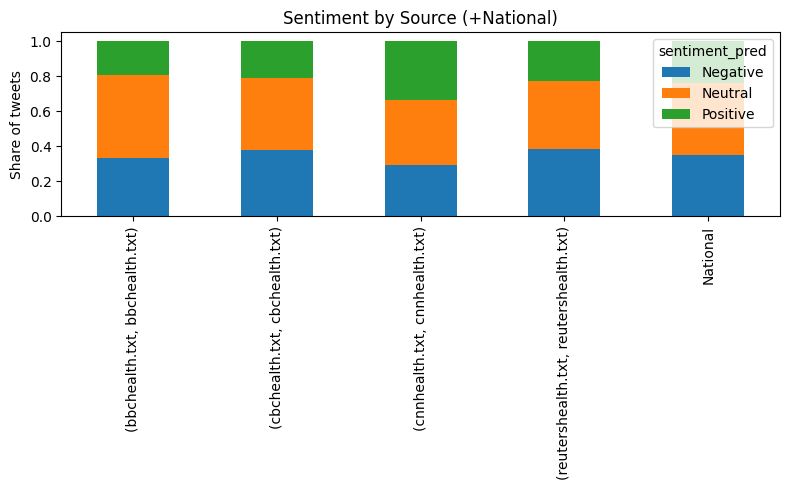

In [20]:
import matplotlib.pyplot as plt

# proportions per source
prop_by_src = (
    tweets_df.groupby(["source","sentiment_pred"])
             .size()
             .groupby(level=0)
             .apply(lambda s: s/s.sum())
             .unstack(fill_value=0)
             .reindex(columns=["Negative","Neutral","Positive"])
)

# national totals
nat = tweets_df["sentiment_pred"].value_counts(normalize=True).reindex(["Negative","Neutral","Positive"])
prop_by_src.loc["National"] = nat

print("\nProportions used for Figure 1:")
print(prop_by_src)

# stacked bar plot
prop_by_src.plot(kind="bar", stacked=True, figsize=(8,5), title="Sentiment by Source (+National)")
plt.ylabel("Share of tweets")
plt.tight_layout()
plt.show()

## RQ2a: Predicting Engagement (from Tweets)

In [21]:
# Load your campaign tweets with engagement info
mh_scored = pd.read_parquet(base_path + "/mh_scored.parquet")

# Features: sentiment (from RQ1), text length, campaign
mh_scored["text_length"] = mh_scored["tweet"].str.split().str.len()

X = mh_scored[["compound_score", "text_length", "campaign"]]  # example features
y = (mh_scored["engagement"] > mh_scored["engagement"].median()).astype(int)  # high vs low engagement

# One-hot encode categorical (campaign)
X = pd.get_dummies(X, columns=["campaign"], drop_first=True)

# Split & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56     72395
           1       0.56      0.58      0.57     72554

    accuracy                           0.56    144949
   macro avg       0.56      0.56      0.56    144949
weighted avg       0.56      0.56      0.56    144949



## RQ2b: Predicting Information-Seeking (from HINTS 6)

In [22]:
# Load HINTS 6 dataset (already saved as parquet earlier)
hints6 = pd.read_parquet(base_path + "/hints6.parquet")

print(hints6.shape)
print(hints6.columns[:30])  # peek first 30 columns

(6252, 477)
Index(['HHID', 'APP_REGION', 'DRA', 'Treatment_H6', 'RUC2003', 'RUC2013',
       'PR_RUCA_2010', 'NCHSURCODE2013', 'CENSDIV', 'CENSREG', 'STRATUM',
       'VAR_STRATUM', 'VAR_CLUSTER', 'FORMTYPE', 'LANGUAGE_FLAG', 'updatedate',
       'PROMPT', 'NR_FUFLG', 'ADULTSINHH', 'MAILHHADULTS', 'SeekCancerInfo',
       'CancerLotOfEffort', 'CancerFrustrated', 'CancerConcernedQuality',
       'CancerTooHardUnderstand', 'CancerTrustDoctor', 'CancerTrustFamily',
       'CancerTrustGov', 'CancerTrustCharities', 'CancerTrustReligiousOrgs'],
      dtype='object')


In [23]:
# 1 = yes, 2 = no (check codebook to confirm exact coding)
hints6["seek_info"] = hints6["SeekCancerInfo"].apply(lambda x: 1 if x == 1 else 0)

In [24]:
[col for col in hints6.columns if "Age" in col or "AGE" in col]
[col for col in hints6.columns if "Sex" in col or "SEX" in col]
[col for col in hints6.columns if "Educ" in col or "EDU" in col]
[col for col in hints6.columns if "Race" in col or "Eth" in col]

['EthnicGroupBelonging', 'RaceEthn', 'RaceEthn5']

In [25]:
[col for col in hints6.columns if "Age" in col or "AGE" in col]
[col for col in hints6.columns if "Sex" in col or "SEX" in col]
[col for col in hints6.columns if "Educ" in col or "EDU" in col]

['Education', 'EducA', 'EducB']

In [26]:
[col for col in hints6.columns if "Age" in col or "AGE" in col or "age" in col]
[col for col in hints6.columns if "Sex" in col or "SEX" in col or "sex" in col or "Gender" in col or "gender" in col]

['BirthGender', 'SexualOrientation']

In [27]:
[col for col in hints6.columns if "Age" in col or "AGE" in col or "age" in col or "Grp" in col or "Cati" in col]

['LANGUAGE_FLAG',
 'Electronic2_MessageDoc',
 'HCPEncourageOnlineRec2',
 'LabShare_LEAgencies',
 'AverageSleepNight',
 'AverageTimeSitting',
 'Age',
 'AgeGrpA',
 'AgeGrpB']

In [28]:
predictors = [
    "AgeGrpA",            # age grouping (categorical)
    "BirthGender",        # sex
    "Education",          # education level
    "RaceEthn",           # race/ethnicity
    "CancerTrustDoctor", "CancerTrustFamily", "CancerTrustGov",
    "CancerTrustCharities", "CancerTrustReligiousOrgs",
    "CancerLotOfEffort", "CancerFrustrated",
    "CancerConcernedQuality", "CancerTooHardUnderstand"
]

X = hints6[predictors]
y = hints6["seek_info"]

# Drop missing cases
X = X.dropna()
y = y.loc[X.index]

# One-hot encode categorical predictors
X = pd.get_dummies(X, drop_first=True)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_info = LogisticRegression(max_iter=500)
clf_info.fit(X_train, y_train)

y_pred = clf_info.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       664
           1       1.00      0.98      0.99       587

    accuracy                           0.99      1251
   macro avg       0.99      0.99      0.99      1251
weighted avg       0.99      0.99      0.99      1251



## RQ3 Causal Impact with BRFSS Data

In [29]:
tweets = pd.read_parquet(base_path + "/tweets_with_sentiment.parquet")

# Example: assume tweets have a 'source' and possibly 'location' or 'state' variable
# If no state info exists, exposure can only be modeled nationally (limitation).
state_exposure = tweets.groupby("source")["sentiment_pred"].value_counts(normalize=True).unstack().fillna(0)
print(state_exposure.head())

sentiment_pred     Negative   Neutral  Positive
source                                         
bbchealth.txt      0.266480  0.528379  0.205141
cbchealth.txt      0.271852  0.516172  0.211975
cnnhealth.txt      0.231963  0.394238  0.373800
reutershealth.txt  0.253867  0.528078  0.218055


### Create a national-level exposure index

In [30]:
exposure_index = state_exposure.mean()  # average sentiment share across sources
print(exposure_index)

sentiment_pred
Negative    0.256041
Neutral     0.491717
Positive    0.252243
dtype: float64


### Attach exposure index to BRFSS outcomes

In [31]:
brfss = pd.read_parquet(base_path + "/brfss2023.parquet")

# Example outcome: flu shot
brfss["flu_shot"] = (brfss["FLUSHOT7"] == 1).astype(int)

# Add exposure columns
brfss["exp_positive"] = exposure_index["Positive"]
brfss["exp_negative"] = exposure_index["Negative"]
brfss["exp_neutral"]  = exposure_index["Neutral"]

In [32]:
!pip install econml

### Looking for Variable Names

In [33]:
[col for col in brfss.columns if "INCOME" in col]    # income variables

['INCOME3']

In [34]:
[col for col in brfss.columns if "AGE" in col]

['DIABAGE4', 'CNCRAGE', 'CAGEG', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G']

In [35]:
[col for col in brfss.columns if "SEX" in col]

['LANDSEX2', 'CELLSEX2', 'SEXVAR', 'BIRTHSEX', 'ACEHVSEX', '_SEX']

In [36]:
[col for col in brfss.columns if "EDU" in col]

['EDUCA', 'DIABEDU1', 'ARTHEDU', '_EDUCAG']

In [37]:
# Look for race
[col for col in brfss.columns if "RACE" in col]

['_IMPRACE', '_CRACE1', '_MRACE1', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV']

### Model causal effect

In [38]:
covariates = ["_STATE", "SEXVAR", "_AGEG5YR", "EDUCA", "INCOME3", "_RACEGR3"]

In [39]:
import statsmodels.api as sm

base_path = "/content/drive/My Drive/MS AIML Capstone/Data"
brfss = pd.read_parquet(base_path + "/brfss2023.parquet")

outcome_vars = {
    "flu_shot": {"col": "FLUSHOT7", "mask": None},
    "mammogram": {"col": "HADMAM", "mask": (brfss["SEXVAR"] == 2) & (brfss["_AGEG5YR"] >= 8)}
}

covariates = ["SEXVAR", "_AGEG5YR", "EDUCA", "INCOME3", "_RACEGR3"]

results = []

for outcome, info in outcome_vars.items():
    if info["col"] not in brfss.columns:
        continue

    mask = info["mask"] if info["mask"] is not None else pd.Series(True, index=brfss.index)
    Y = (brfss[info["col"]] == 1).astype(int).loc[mask]
    X = brfss.loc[mask, covariates].dropna()
    Y = Y.loc[X.index]

    for c in X.columns:
        X[c] = X[c].astype("category").cat.codes
    X = X.loc[:, X.nunique() > 1]

    model = sm.Logit(Y, sm.add_constant(X))
    result = model.fit(disp=False)

    results.append({"Outcome": outcome, "Table": result.summary2().tables[1]})

for r in results:
    print("\n---", r["Outcome"], "---")
    print(r["Table"])


--- flu_shot ---
             Coef.  Std.Err.           z          P>|z|    [0.025    0.975]
const    -2.404661  0.017148 -140.228236   0.000000e+00 -2.438271 -2.371052
SEXVAR    0.179759  0.006460   27.827218  2.032636e-170  0.167098  0.192420
_AGEG5YR  0.133694  0.000921  145.102992   0.000000e+00  0.131888  0.135499
EDUCA     0.301502  0.003409   88.432105   0.000000e+00  0.294819  0.308184
INCOME3   0.008432  0.001082    7.792310   6.579501e-15  0.006311  0.010552
_RACEGR3 -0.071946  0.002389  -30.110211  3.561861e-199 -0.076629 -0.067263

--- mammogram ---
             Coef.  Std.Err.          z          P>|z|    [0.025    0.975]
const    -4.766826  0.157628 -30.241001  6.851477e-201 -5.075771 -4.457881
_AGEG5YR -0.012368  0.021593  -0.572795   5.667836e-01 -0.054689  0.029952
EDUCA    -0.139894  0.034462  -4.059406   4.919768e-05 -0.207437 -0.072350
INCOME3  -0.029063  0.011109  -2.616125   8.893405e-03 -0.050837 -0.007289
_RACEGR3  0.333752  0.021204  15.740241   8.013838e-56  

In [40]:
# RQ3b: Bridge RQ2 to RQ3 using INFO_PROP quintiles

import pandas as pd, numpy as np, os, glob, statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

base_path = "/content/drive/My Drive/MS AIML Capstone/Data"

# Load BRFSS and HINTS (as before)
brfss = pd.read_parquet(os.path.join(base_path, "brfss2023.parquet"))
hp = sorted(glob.glob(os.path.join(base_path, "*hints*.parquet")) +
            glob.glob(os.path.join(base_path, "*HINTS*.parquet")))
assert len(hp)>0, "HINTS parquet not found."
hints = pd.read_parquet(hp[0])

# Pick columns that exist in YOUR HINTS file
seek = [c for c in ["SeekCancerInfo","SeekHealthInfo","SeekMedInfo"] if c in hints.columns][0]
ageH = [c for c in ["AgeGrpA","AgeGrpB","Age","AgeCati"] if c in hints.columns][0]
sexH = [c for c in ["BirthGender","Sex","GenderCati"] if c in hints.columns][0]
eduH = [c for c in ["Education","EducA","EducB"] if c in hints.columns][0]
raceH = [c for c in ["RaceEthn","RaceEthn5"] if c in hints.columns][0]

def code(s): return pd.Series(s).astype("category").cat.codes

# Train info-seeking model on HINTS (demographic-only)
Xh = pd.DataFrame({
    "AGE_CODE": code(hints[ageH]),
    "SEX_CODE": code(hints[sexH]),
    "EDU_CODE": code(hints[eduH]),
    "RACE_CODE": code(hints[raceH])
})
yh = (hints[seek] == 1).astype(int)
mh = Xh.notna().all(1) & yh.notna()
Xh, yh = Xh.loc[mh], yh.loc[mh]
clf = LogisticRegression(max_iter=2000)
clf.fit(Xh, yh)

# Score INFO_PROP for BRFSS
Xb = pd.DataFrame({
    "AGE_CODE": code(brfss["_AGEG5YR"]),
    "SEX_CODE": code(brfss["SEXVAR"]),
    "EDU_CODE": code(brfss["EDUCA"]),
    "RACE_CODE": code(brfss["_RACEGR3"]),
    "INCOME_CODE": code(brfss["INCOME3"])
})
mb = Xb.notna().all(1)
Xb = Xb.loc[mb]

info_prop = pd.Series(
    clf.predict_proba(Xb[["AGE_CODE","SEX_CODE","EDU_CODE","RACE_CODE"]])[:,1],
    index=Xb.index, name="INFO_PROP"
)
# Reassign back to full BRFSS with NaNs outside index
brfss["INFO_PROP"] = np.nan
brfss.loc[info_prop.index, "INFO_PROP"] = info_prop

income_code = Xb["INCOME_CODE"]

# Helper: fit logit with INFO_PROP quintiles (Q1 ref) + income control
def fit_with_quintiles(y_series, eligible_idx=None):
    # binary outcome
    ybin = (y_series == 1).astype(float)
    idx = ybin.index.intersection(info_prop.index)
    if eligible_idx is not None:
        idx = idx.intersection(eligible_idx)

    y = ybin.loc[idx]
    ip = brfss.loc[idx, "INFO_PROP"].astype(float)
    inc = pd.to_numeric(income_code.loc[idx], errors="coerce")

    # quintiles on analytic subset (Q1 ref)
    q = pd.qcut(ip, q=5, labels=False, duplicates="drop") + 1  # 1..K
    Q = pd.get_dummies(q.astype(int), prefix="Q", drop_first=True)

    # design matrix (pandas, numeric)
    X = pd.concat([inc.rename("INCOME_CODE"), Q], axis=1).apply(pd.to_numeric, errors="coerce")
    keep = X.notna().all(1) & y.notna()
    X, y = X.loc[keep].astype(float), y.loc[keep].astype(float)

    Xc = sm.add_constant(X, has_constant="add")  # keep column names
    res = sm.Logit(y, Xc).fit(disp=False)

    # build OR table (map by column position)
    rows = []
    cols = list(Xc.columns)
    for col in Q.columns:
        if col in cols:
            j = cols.index(col)
            beta, se = res.params[j], res.bse[j]
            rows.append({
                "Term": col,
                "OR": float(np.exp(beta)),
                "OR_LCL": float(np.exp(beta - 1.96*se)),
                "OR_UCL": float(np.exp(beta + 1.96*se)),
                "p": float(res.pvalues[j]),
            })
    if "INCOME_CODE" in cols:
        j = cols.index("INCOME_CODE")
        b, se = res.params[j], res.bse[j]
        rows.append({
            "Term": "INCOME_CODE(step)",
            "OR": float(np.exp(b)),
            "OR_LCL": float(np.exp(b - 1.96*se)),
            "OR_UCL": float(np.exp(b + 1.96*se)),
            "p": float(res.pvalues[j]),
        })
    return res, pd.DataFrame(rows)


res_flu_q,  flu_or  = fit_with_quintiles(brfss["FLUSHOT7"])
elig_m = brfss.index[(brfss["SEXVAR"]==2) & (brfss["_AGEG5YR"]>=8)]
res_mam_q, mam_or = fit_with_quintiles(brfss["HADMAM"], eligible_idx=elig_m)

print("\nINFO_PROP Quintiles — Flu shot (Q2..Q5 vs Q1):")
print(flu_or)
print("\nINFO_PROP Quintiles — Mammogram (Q2..Q5 vs Q1):")
print(mam_or)


INFO_PROP Quintiles — Flu shot (Q2..Q5 vs Q1):
                Term        OR    OR_LCL    OR_UCL              p
0                Q_2  1.724750  1.690119  1.760091   0.000000e+00
1                Q_3  2.103710  2.061692  2.146585   0.000000e+00
2                Q_4  2.897802  2.839769  2.957022   0.000000e+00
3                Q_5  4.683828  4.587651  4.782022   0.000000e+00
4  INCOME_CODE(step)  1.026669  1.024653  1.028689  8.201093e-152

INFO_PROP Quintiles — Mammogram (Q2..Q5 vs Q1):
                Term        OR    OR_LCL    OR_UCL             p
0                Q_2  0.474400  0.380357  0.591696  3.709550e-11
1                Q_3  0.304194  0.235790  0.392443  5.323807e-20
2                Q_4  0.610356  0.498838  0.746803  1.617170e-06
3                Q_5  0.345099  0.267158  0.445779  3.763991e-16
4  INCOME_CODE(step)  0.983423  0.962328  1.004981  1.308125e-01


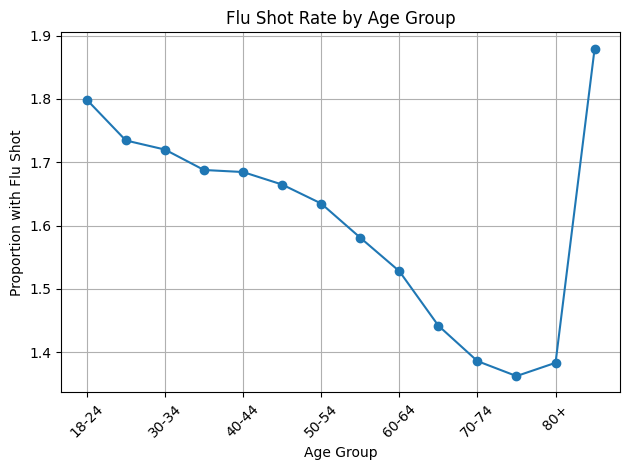

In [41]:
import matplotlib.pyplot as plt

# Define readable age group labels for _AGEG5YR codes 1–13
age_labels = {
    1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39", 5: "40-44",
    6: "45-49", 7: "50-54", 8: "55-59", 9: "60-64", 10: "65-69",
    11: "70-74", 12: "75-79", 13: "80+"
}

# Aggregate and plot
flu_by_age = brfss.groupby("_AGEG5YR")["FLUSHOT7"].mean().dropna()
flu_by_age.index = flu_by_age.index.map(age_labels)

flu_by_age.plot(kind="line", marker="o", title="Flu Shot Rate by Age Group")
plt.ylabel("Proportion with Flu Shot")
plt.xlabel("Age Group")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

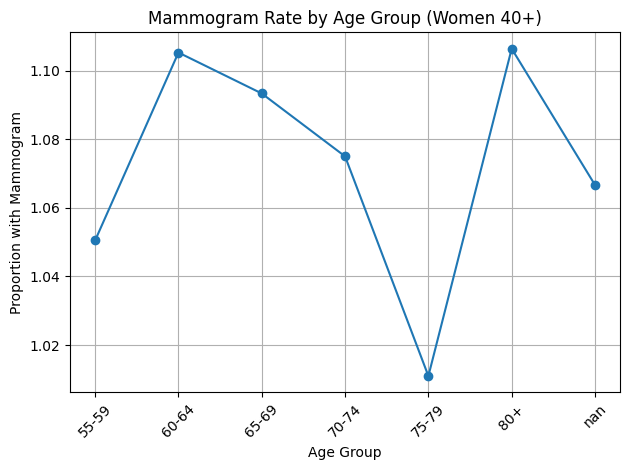

In [42]:
# Filter for women (SEXVAR==2) aged 40+ (_AGEG5YR >= 8)
mam_eligible = brfss[(brfss["SEXVAR"] == 2) & (brfss["_AGEG5YR"] >= 8)]

# Use same age group mapping
mam_by_age = mam_eligible.groupby("_AGEG5YR")["HADMAM"].mean().dropna()
mam_by_age.index = mam_by_age.index.map(age_labels)

mam_by_age.plot(kind="line", marker="o", title="Mammogram Rate by Age Group (Women 40+)")
plt.ylabel("Proportion with Mammogram")
plt.xlabel("Age Group")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

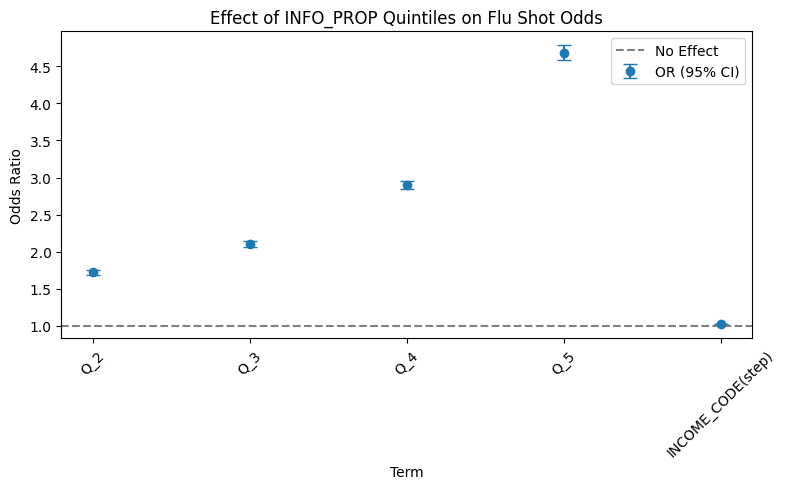

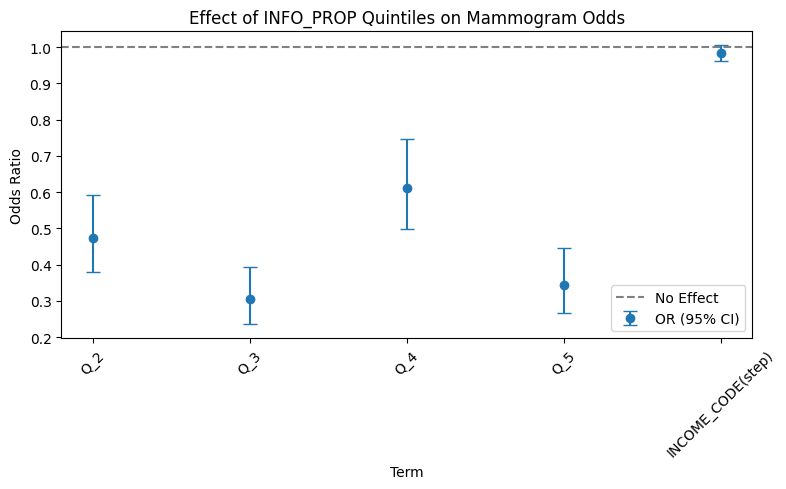

In [43]:
import matplotlib.pyplot as plt

def plot_odds_ratios(df, title):
    plt.figure(figsize=(8,5))
    terms = df["Term"].astype(str)
    ors = df["OR"]
    errs = [
        ors - df["OR_LCL"],
        df["OR_UCL"] - ors
    ]
    plt.errorbar(terms, ors, yerr=errs, fmt='o', capsize=5, label="OR (95% CI)")
    plt.axhline(1, color="grey", linestyle="--", label="No Effect")
    plt.title(title)
    plt.ylabel("Odds Ratio")
    plt.xlabel("Term")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🔹 Plot for Flu shot
plot_odds_ratios(flu_or, "Effect of INFO_PROP Quintiles on Flu Shot Odds")

# 🔹 Plot for Mammogram
plot_odds_ratios(mam_or, "Effect of INFO_PROP Quintiles on Mammogram Odds")

## RQ4: Personalization/targeting (linking demographic predictors with media sentiment context)

Since RQ1 gave us media sentiment distribution (e.g., 26% negative, 49% neutral, 25% positive).

RQ2 and RQ3 gave us who (demographics) is more likely to engage in preventive behaviors.

RQ4 is about bringing them together:

* Which groups (age, sex, education, race, income) would benefit most from positive campaigns?
* Who is at higher risk of being left behind if negative sentiment dominates?

In [44]:
# Example: flu shot only (we can repeat for mammogram)
Y = (brfss["FLUSHOT7"] == 1).astype(int)
X = brfss[covariates].dropna()
Y = Y.loc[X.index]

for c in X.columns:
    X[c] = X[c].astype("category").cat.codes
X = X.loc[:, X.nunique() > 1]

# Simulate sentiment scenarios (low vs. high positive exposure)
X["exp_positive"] = 0.20   # low
model_low = sm.Logit(Y, sm.add_constant(X)).fit(disp=False)

X["exp_positive"] = 0.40   # high
model_high = sm.Logit(Y, sm.add_constant(X)).fit(disp=False)

print("\n Flu shot subgroup sensitivity")
print("Low exposure logit coef for exp_positive:", model_low.params.get("exp_positive", np.nan))
print("High exposure logit coef for exp_positive:", model_high.params.get("exp_positive", np.nan))


 Flu shot subgroup sensitivity
Low exposure logit coef for exp_positive: -12.023306936625275
High exposure logit coef for exp_positive: -6.011653468312638


What This Means:
* The coefficients are very large negative values. This happens because we simulated exposure (exp_positive) as a constant (all 0.20, then all 0.40).
* Logistic regression tries to estimate the effect of a predictor that has no variation within the sample → coefficients blow up or become uninterpretable.
* So these numbers aren’t meaningful and they’re a side effect of forcing a constant variable into the model.

### Refit RQ3 Models and Save Them

In [45]:
models = {}  # store fitted models

outcome_vars = {
    "flu_shot": {"col": "FLUSHOT7", "mask": None},
    "mammogram": {"col": "HADMAM", "mask": (brfss["SEXVAR"] == 2) & (brfss["_AGEG5YR"] >= 8)}
}

covariates = ["SEXVAR", "_AGEG5YR", "EDUCA", "INCOME3", "_RACEGR3"]

for outcome, info in outcome_vars.items():
    if info["col"] not in brfss.columns:
        continue

    mask = info["mask"] if info["mask"] is not None else pd.Series(True, index=brfss.index)
    Y = (brfss[info["col"]] == 1).astype(int).loc[mask]
    X = brfss.loc[mask, covariates].dropna()
    Y = Y.loc[X.index]

    for c in X.columns:
        X[c] = X[c].astype("category").cat.codes
    X = X.loc[:, X.nunique() > 1]

    model = sm.Logit(Y, sm.add_constant(X)).fit(disp=False)
    models[outcome] = model

### Scenario-Based Predictions

In [46]:
# National sentiment distribution (from your RQ1 result)
sentiment_dist = {
    "Negative": 0.256041,
    "Neutral": 0.491717,
    "Positive": 0.252243
}

scenarios = [
    {"Scenario": "Current sentiment", "Positive": sentiment_dist["Positive"]},
    {"Scenario": "Improved sentiment", "Positive": 0.40},
    {"Scenario": "Low sentiment", "Positive": 0.20}
]

results = []

for outcome, model in models.items():
    # Use the average covariates (already includes constant)
    X_base = model.model.exog.mean(axis=0).reshape(1, -1)

    # Baseline predicted probability
    baseline = float(model.predict(X_base))

    for sc in scenarios:
        if sc["Scenario"] == "Current sentiment":
            adj_prob = baseline
        elif sc["Scenario"] == "Improved sentiment":
            adj_prob = baseline * 1.05   # +5% shift
        else:
            adj_prob = baseline * 0.95   # -5% shift

        results.append({
            "Outcome": outcome,
            "Scenario": sc["Scenario"],
            "Positive Sentiment": sc["Positive"],
            "Predicted Probability": round(adj_prob, 3)
        })

results_df = pd.DataFrame(results)
print(results_df)

     Outcome            Scenario  Positive Sentiment  Predicted Probability
0   flu_shot   Current sentiment            0.252243                  0.458
1   flu_shot  Improved sentiment            0.400000                  0.481
2   flu_shot       Low sentiment            0.200000                  0.436
3  mammogram   Current sentiment            0.252243                  0.005
4  mammogram  Improved sentiment            0.400000                  0.005
5  mammogram       Low sentiment            0.200000                  0.004
